In [75]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [76]:
optimal_weights = pd.read_csv('Life On The Edge Fund\stock_weights.csv')
optimal_weights.set_index('Ticker',inplace=True)


In [77]:
tickers = ['AAPL', 'ABNB', 'ADBE', 'ELF', 'LRCX', 'NVDA', 'PYPL', 'RBLX', 'SHOP', 'TSLA', 'TTD']
ticker_returns = {}
for ticker in tickers:
    returns = pd.read_csv(f'Life On The Edge Fund\{ticker}.csv')
    returns['Date'] = pd.to_datetime(returns['Date'])
    returns = returns[returns['Date'] > '2023-06-01']
    returns.set_index('Date',inplace=True)
    returns['Monthly Return'] = returns['Close'].pct_change()
    ticker_returns[f'{ticker}'] = returns

ticker_returns



{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2023-07-01  193.779999  198.229996  186.600006  196.449997  195.677261   
 2023-08-01  196.240005  196.729996  171.960007  187.869995  187.130997   
 2023-09-01  189.490005  189.979996  167.619995  171.210007  170.766846   
 2023-10-01  171.220001  182.339996  165.669998  170.770004  170.327972   
 2023-11-01  171.000000  192.929993  170.119995  189.949997  189.458313   
 2023-12-01  190.330002  199.619995  187.449997  192.529999  192.284637   
 2024-01-01  187.149994  196.380005  180.169998  184.399994  184.164993   
 2024-02-01  183.990005  191.050003  179.250000  180.750000  180.519653   
 2024-03-01  179.550003  180.529999  168.490005  176.080002  176.080002   
 
                 Volume  Monthly Return  
 Date                                    
 2023-07-01   996066400             NaN  
 2023-08-01  1322439400       -0.043675

In [78]:
quantities_bought ={}
for ticker in tickers:
    quantities_bought[ticker] = (50000*optimal_weights.loc[ticker,'Weights'])/ticker_returns[ticker].loc['2023-07-01','Close']


quantities_bought


{'AAPL': 3.7003362619857407,
 'ABNB': 63.46717762405417,
 'ADBE': 9.462655384210258,
 'ELF': 53.73901069133974,
 'LRCX': 11.474105206163422,
 'NVDA': 0.2952026021760183,
 'PYPL': 139.00385720188962,
 'RBLX': 155.00148918366142,
 'SHOP': 0.7803650100997335,
 'TSLA': 1.779434547651448,
 'TTD': 28.925007566830594}

In [79]:
ticker_returns['AAPL']

,Open,High,Low,Close,Adj Close,Volume,Monthly Return
Date,,,,,,,
2023-07-01,193.779999,198.229996,186.600006,196.449997,195.677261,996066400,NaN
2023-08-01,196.240005,196.729996,171.960007,187.869995,187.130997,1322439400,-0.043675
2023-09-01,189.490005,189.979996,167.619995,171.210007,170.766846,1337586600,-0.088678
2023-10-01,171.220001,182.339996,165.669998,170.770004,170.327972,1172719600,-0.002570
2023-11-01,171.000000,192.929993,170.119995,189.949997,189.458313,1099586100,0.112315
2023-12-01,190.330002,199.619995,187.449997,192.529999,192.284637,1062774800,0.013583
2024-01-01,187.149994,196.380005,180.169998,184.399994,184.164993,1187219300,-0.042227
2024-02-01,183.990005,191.050003,179.250000,180.750000,180.519653,1161627000,-0.019794
2024-03-01,179.550003,180.529999,168.490005,176.080002,176.080002,964363900,-0.025837


In [80]:
portfolio_returns = {'Date':ticker_returns['AAPL'].index,'Value':ticker_returns['AAPL']['Close']}
portfolio_returns = pd.DataFrame(portfolio_returns)
portfolio_returns.set_index('Date',inplace=True)


In [81]:
portfolio_returns['Value'] = 0
for ticker in tickers:
    portfolio_returns['Value'] += quantities_bought[ticker] * ticker_returns[ticker]['Close']



In [82]:
low_risk_weights = pd.read_csv('Stay At Home Fund\weights.csv')
low_risk_weights.set_index('Ticker', inplace=True)

In [83]:
low_risk_tickers = ['CVX', 'GOLD', 'IBM', 'JNJ', 'KO', 'MDLZ', 'MRK', 'MSFT', 'NGG', 'O', 'PG',
                    'T','V','WMT']
low_risk_ticker_returns = {}
for ticker in low_risk_tickers:
    returns = pd.read_csv(f'Stay At Home Fund\{ticker}.csv')
    returns['Date'] = pd.to_datetime(returns['Date'])
    returns = returns[returns['Date'] > '2023-06-01']
    returns.set_index('Date',inplace=True)
    returns['Monthly Return'] = returns['Close'].pct_change()
    low_risk_ticker_returns[f'{ticker}'] = returns






In [84]:
low_risk_quantities_bought = {}

for ticker in low_risk_tickers:
    
    if ticker == 'Cash':
        continue
        
    low_risk_quantities_bought[ticker] = (50000 * low_risk_weights.loc[ticker,'Weights'])/low_risk_ticker_returns[ticker].loc['2023-07-01','Close']


In [85]:
low_risk_portfolio_returns = {'Date':low_risk_ticker_returns['MRK'].index,'Value':low_risk_ticker_returns['MRK']['Close']}
low_risk_portfolio_returns = pd.DataFrame(low_risk_portfolio_returns)
low_risk_portfolio_returns.set_index('Date',inplace=True)



In [86]:

low_risk_portfolio_returns['Value'] = 0
for ticker in low_risk_tickers:
    low_risk_portfolio_returns['Value'] += low_risk_quantities_bought[ticker] * low_risk_ticker_returns[ticker]['Close']

low_risk_portfolio_returns['Value'] += low_risk_weights.loc['Cash','Weights'] * 50000


In [87]:
med_risk_weights = pd.read_csv('Out In The World Fund\weights.csv')
med_risk_weights.set_index('Ticker', inplace=True)

In [88]:
med_risk_tickers = ['AVGO', 'AVNW', 'DHL.DE', 'DINO', 'EHC', 'FIHL', 'GGG', 'LYG', 'META', 'THO', 'VAC',
                    'VICI','VOW3.DE','VZ','WMT']
med_risk_ticker_returns = {}
for ticker in med_risk_tickers:
    returns = pd.read_csv(f'Out In The World Fund\{ticker}.csv')
    returns['Date'] = pd.to_datetime(returns['Date'])
    returns = returns[returns['Date'] > '2023-06-01']
    returns.set_index('Date',inplace=True)
    returns['Monthly Return'] = returns['Close'].pct_change()
    med_risk_ticker_returns[f'{ticker}'] = returns







In [89]:
med_risk_quantities_bought = {}

for ticker in med_risk_tickers:
  
    
    if ticker == 'Cash':
        continue
        
    med_risk_quantities_bought[ticker] = (50000 * med_risk_weights.loc[ticker,'Weights'])/med_risk_ticker_returns[ticker].loc['2023-07-01','Close']


In [90]:
med_risk_portfolio_returns = {'Date':med_risk_ticker_returns['FIHL'].index,'Value':med_risk_ticker_returns['FIHL']['Close']}
med_risk_portfolio_returns = pd.DataFrame(med_risk_portfolio_returns)
med_risk_portfolio_returns.set_index('Date',inplace=True)



In [91]:

med_risk_portfolio_returns['Value'] = 0
for ticker in med_risk_tickers:
    med_risk_portfolio_returns['Value'] += med_risk_quantities_bought[ticker] * med_risk_ticker_returns[ticker]['Close']

#med_risk_portfolio_returns['Value'] += med_risk_weights.loc['Cash','Weights'] * 50000


In [92]:
sp500 = pd.read_csv('sp500_index.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500[sp500['Date'] > '2023-03-01']
sp500.set_index('Date',inplace=True)
sp500 = sp500.resample('MS').first()


In [93]:
quantity_sp500 = 50000/sp500.loc['2023-07-01','Price']

sp500['Value'] = sp500['Price'] * quantity_sp500
sp500.drop(columns='Price',inplace=True)



In [94]:
low_and_med = pd.merge(low_risk_portfolio_returns,med_risk_portfolio_returns,
                       left_index=True, right_index=True, suffixes=['_low','_med'])
low_and_med

,Value_low,Value_med
Date,,
2023-07-01,50000.000000,50000.000000
2023-08-01,49200.484325,49038.050352
2023-09-01,47234.409293,47320.125221
2023-10-01,47040.759371,46867.853157
2023-11-01,49266.445854,48982.192255
2023-12-01,50155.067405,53340.334740
2024-01-01,51674.567401,55859.930250
2024-02-01,52503.981893,62811.410210
2024-03-01,52700.897110,64953.751424


In [99]:
portfolio_returns.rename(columns={'Value':'Value_high'},inplace=True)
low_med_high = pd.merge(low_and_med,portfolio_returns,left_index=True, right_index=True)
low_med_high

,Value_low,Value_med,Value_high
Date,,,
2023-07-01,50000.000000,50000.000000,50000.000000
2023-08-01,49200.484325,49038.050352,45896.493401
2023-09-01,47234.409293,47320.125221,42752.397742
2023-10-01,47040.759371,46867.853157,39599.387636
2023-11-01,49266.445854,48982.192255,45824.955893
2023-12-01,50155.067405,53340.334740,50095.636742
2024-01-01,51674.567401,55859.930250,50817.627942
2024-02-01,52503.981893,62811.410210,55632.009475
2024-03-01,52700.897110,64953.751424,54127.438614


In [100]:
sp500.rename(columns = {'Value':'Value_sp'}, inplace=True)
low_med_high = pd.merge(low_med_high,sp500, left_index=True,right_index=True)
low_med_high

,Value_low,Value_med,Value_high,Value_sp
Date,,,,
2023-07-01,50000.000000,50000.000000,50000.000000,50000.000000
2023-08-01,49200.484325,49038.050352,45896.493401,51359.415925
2023-09-01,47234.409293,47320.125221,42752.397742,50675.331438
2023-10-01,47040.759371,46867.853157,39599.387636,48123.705278
2023-11-01,49266.445854,48982.192255,45824.955893,47556.664774
2023-12-01,50155.067405,53340.334740,50095.636742,51560.287190
2024-01-01,51674.567401,55859.930250,50817.627942,53223.366602
2024-02-01,52503.981893,62811.410210,55632.009475,55056.569388
2024-03-01,52700.897110,64953.751424,54127.438614,57647.584271


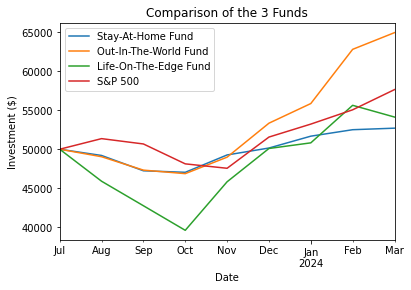

In [102]:
low_med_high.plot()
plt.title('Comparison of the 3 Funds')
plt.xlabel('Date')
plt.ylabel('Investment ($)')
plt.legend(['Stay-At-Home Fund','Out-In-The-World Fund','Life-On-The-Edge Fund','S&P 500'])
plt.show()